In [20]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import json

In [30]:
import glob

directories = glob.glob('toy_single_*')

labels = []
data = []

for directory in directories:
	with open(directory + '/log.txt') as f:
		results = [json.loads(entry) for entry in  f.readlines()]
	cost_class, cost_bbox, cost_giou, bbox_loss_coef, giou_loss_coef, eos_coef = directory[11:].split('_')
	label = f"cost_class: {cost_class}, cost_bbox: {cost_bbox}, cost_giou: {cost_giou}, bbox_loss_coef: {bbox_loss_coef}, giou_loss_coef: {giou_loss_coef}, eos_coef: {eos_coef}"
	labels.append(label)
	best_result = max(results, key=lambda x: x['test_coco_eval_bbox'][0])
	data.append(best_result['test_coco_eval_bbox'][0])


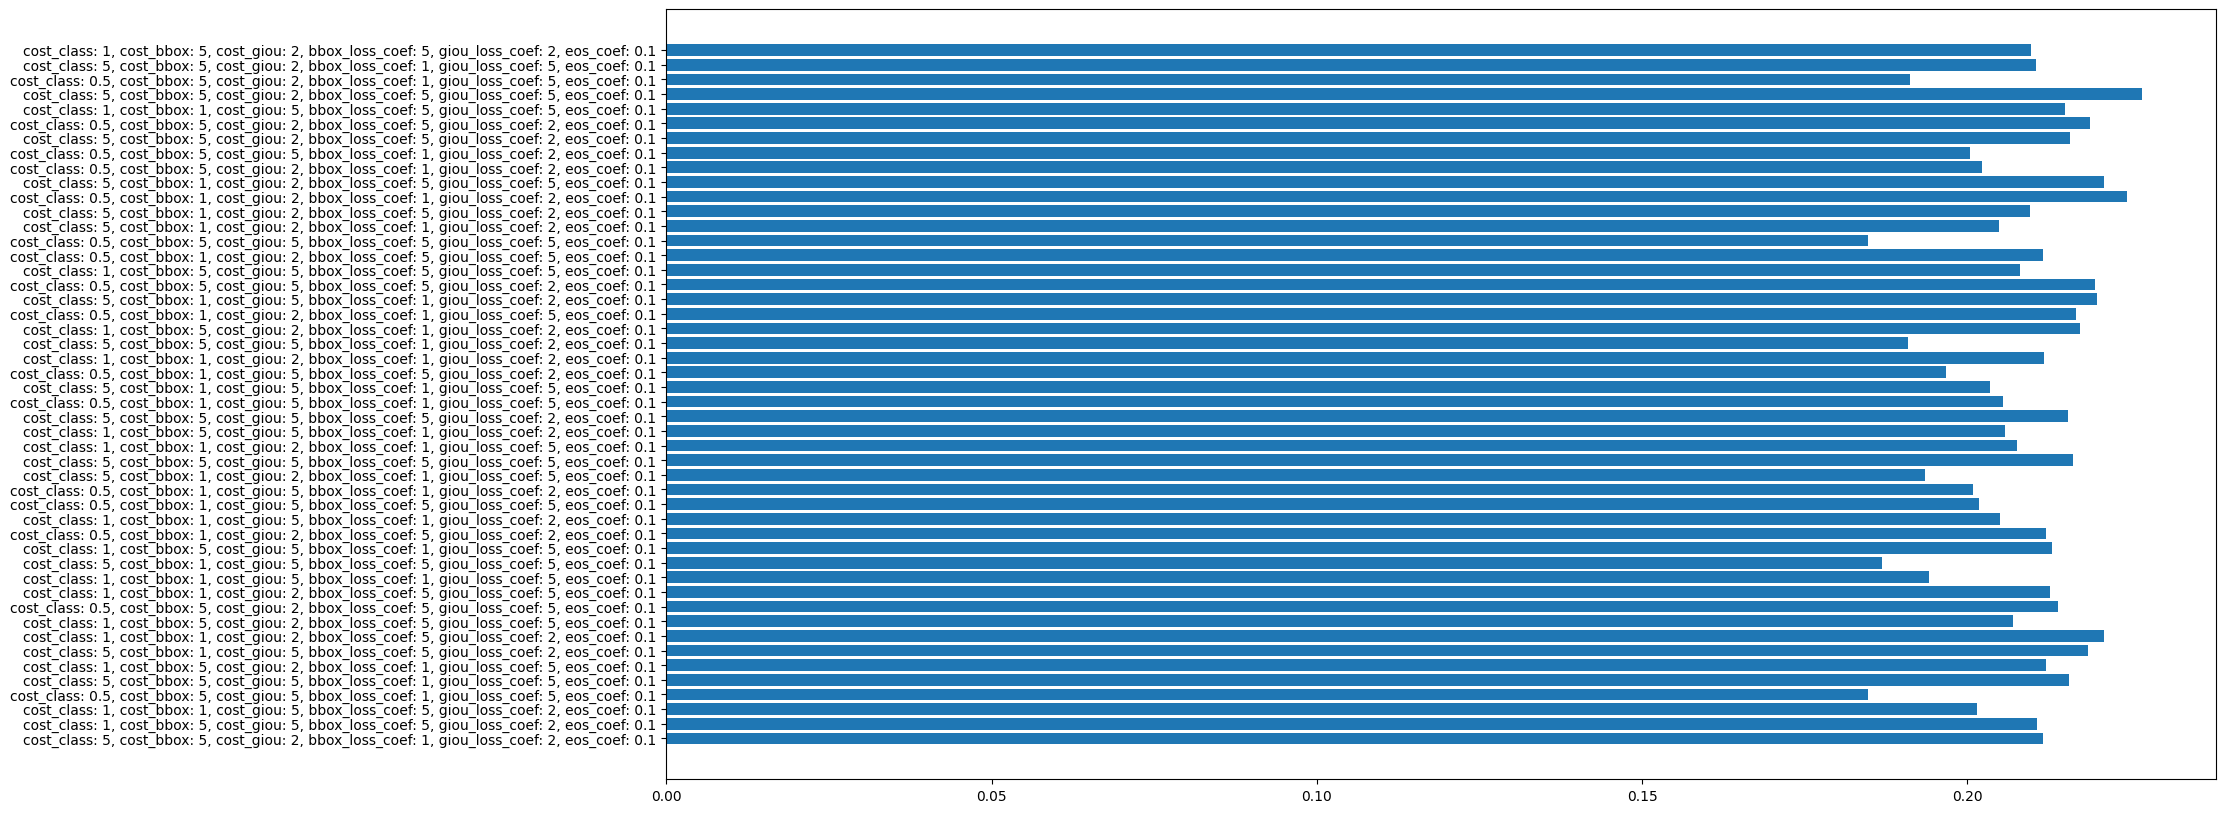

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.barh(labels, data)
plt.show()